# 作業
### 用 digits (dataset.load_digits()) 資料嘗試跑 t-SNE


In [1]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import offsetbox
from sklearn import manifold, datasets

%matplotlib inline

In [2]:
digits = datasets.load_digits()

x = digits.data
y = digits.target

In [3]:
x.shape

(1797, 64)

In [4]:
# 設定模型參數
n_samples = x.shape[0]
n_features = x.shape[1]
n_neighbors = 30
tsne = manifold.TSNE(n_components=2, random_state=0, init='pca', learning_rate=500, early_exaggeration=12)

In [5]:
# Scale and visualize the embedding vectors
def plot_embedding(x, title=None):
    x_min = np.min(x, 0)
    x_max = np.max(x, 0)
    x = (x-x_min)/(x_max-x_min)
    
    plt.figure()
    ax = plt.subplot()
    
    for i in range(x.shape[0]):
        plt.text(x[i,0], x[i,1], str(y[i]),
                 color = plt.cm.Set1(y[i]/10),
                 fontdict = {'weight': 'bold', 'size':9})
    
    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array( [[1,1]] ) # just something big
        
        for i in range(x.shape[0]):
            dist = np.sum( (x[i] - shown_images)**2, 1 )
            if np.min(dist) < 4e-3:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [x[i]]]
            imagebox = offsetbox.AnnotationBbox(offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r),
                                                x[i])
            ax.add_artist(imagebox)
    
    plt.xticks([])
    plt.yticks([])
    
    if title is not None:
        plt.title(title)


Computing t-SNE embedding


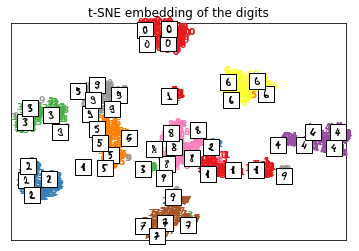

In [6]:
# t-SNE embedding of the digits dataset
print('Computing t-SNE embedding')

x_tsne = tsne.fit_transform(x)

plot_embedding(x_tsne, 't-SNE embedding of the digits')

plt.show()